# Evaluacion de los modelos de predicción.

<a id="0"></a> <br>
### Índice:
1. [Introdución](#1)  
2. [Evaluación de modelo de regresion lineal](#2)  
3. [Evaluación de modelo de arbol de decisión](#3)
4. [Evaluación de modelo de random forest](#4)    
5. [Evaluación de modelo de Ada Boost](#5)  
6. [Evaluación de modelo de Gradient Boosting Regressor](#6)  
7. [Evaluación de modelo de PCA Random Forest Regressor](#7) 
4. [Análisis de métricas](#8)

<a id="1"></a> <br>
## Introducción

Aquí vamos a evaluar los errores que podemos tener en este problema de regresion.  
Para ello vamos a evaluar estas caracteristicas:

-   MAE (Mean Absolute Error): El MAE es la media del valor absoluto de las diferencias entre las predicciones y los valores reales. Cuanto menor   sea el MAE, mejor será el modelo en términos de precisión.

-   MAPE (Mean Absolute Percentage Error): El MAPE es la media del porcentaje absoluto de las diferencias entre las predicciones y los valores reales, en relación con los valores reales. Es una medida relativa que proporciona una idea del error porcentual promedio. Al igual que el MAE, cuanto menor sea el MAPE, mejor será el modelo.

-   MSE (Mean Squared Error): El MSE es la media de los errores al cuadrado entre las predicciones y los valores reales. El MSE asigna un mayor peso a los errores más grandes, lo que implica que los valores extremos tienen un impacto más significativo en la métrica. Cuanto menor sea el MSE, mejor será el modelo en términos de precisión.

-   RMSE (Root Mean Squared Error): El RMSE es la raíz cuadrada del MSE. Se utiliza para tener una medida del error en la misma unidad que la variable objetivo, lo que lo hace más fácil de interpretar. Al igual que el MSE, un valor de RMSE más bajo indica un modelo más preciso.

-   R2 score (R-squared): El R2 score, también conocido como coeficiente de determinación, indica qué tan bien se ajustan los valores predichos por el modelo a los valores reales. Varía entre 0 y 1, donde 1 indica un ajuste perfecto del modelo. Un R2 score más alto sugiere una mejor capacidad de predicción del modelo.

Primero vamos a crear un data frame vacio para ir recogiendo toda la información que obtenemos de las evaluaciones para despues hacer un análisis de todos ellos y ver cual es el mejor modelo.

In [20]:
# Cargamos librerias
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import yaml
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_conc = pd.DataFrame({"Métricas": ["MAE","MAPE","MSE","RMSE", "R2Score"]}).set_index("Métricas")

<a id="2"></a> <br>
### 1. Evaluación del modelo de regresión lineal.

In [5]:

# Cargamos el modelo entrenado y sus caracteristicas para arreglar con conversion polinómica.

with open('../models/modelo_lineal/model_config_lin.yaml', 'r') as file:
    model_config = yaml.safe_load(file)

model_path = '../models/modelo_lineal/trained_lin_reg.pkl'

with open(model_path, 'rb') as f:
        lin_reg = pickle.load(f)

# Cargamos data test

df_test = pd.read_csv('../data/test/test.csv')

# Obtener las características (X_test) y las etiquetas (y_test)

X_test = df_test.drop('Rating Average', axis=1)
y_test = df_test['Rating Average']

# Realizar las predicciones

predictions = lin_reg.predict(X_test)

# Calcular las métricas de evaluación

mae_lin = mean_absolute_error(y_test, predictions)
mape_lin = mean_absolute_percentage_error(y_test, predictions)
mse_lin = mean_squared_error(y_test, predictions)
rmse_lin = mean_squared_error(y_test, predictions, squared=False)
r2_lin = r2_score(y_test, predictions)

# Imprimir las métricas

print("Mean Absolute Error (MAE):", round(mae_lin,4))
print("Mean Absolute Percentage Error (MAPE):", round(mape_lin,4))
print("Mean Squared Error (MSE):", round(mse_lin,4))
print("Root Mean Squared Error (RMSE):", round(rmse_lin,4))
print("R-squared (R2) Score:", round(r2_lin,4))

list_lin = [round(mae_lin,4),round(mape_lin,4),round(mse_lin,4),round(rmse_lin,4),round(r2_lin,4)]


Mean Absolute Error (MAE): 0.4007
Mean Absolute Percentage Error (MAPE): 0.065
Mean Squared Error (MSE): 0.3081
Root Mean Squared Error (RMSE): 0.5551
R-squared (R2) Score: 0.6474


<a id="3"></a> <br>
### Evaluación del modelo de arbol de decisión

In [6]:
# Carga de modelo
model_path = '../models/arbol_decision/dtr_gs.pkl'

with open(model_path, 'rb') as f:
        dtr_gs = pickle.load(f)

# Cargamos data test

df_test = pd.read_csv('../data/test/test.csv')

# Obtener las características (X_test)

X_test = df_test.drop('Rating Average', axis=1)
y_test = df_test['Rating Average']

# Obtener el mejor modelo entrenado

y_pred_dtr = dtr_gs.best_estimator_.predict(X_test)

mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mape_dtr = mean_absolute_percentage_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
rmse_dtr = mean_squared_error(y_test, y_pred_dtr, squared=False)
r2_dtr = r2_score(y_test, y_pred_dtr)
print("Mean Absolute Error (MAE):", round(mae_dtr,4))
print("Mean Absolute Percentage Error (MAPE):", round(mape_dtr,4))
print("Mean Squared Error (MSE):", round(mse_dtr,4))
print("Root Mean Squared Error (RMSE):", round(rmse_dtr,4))
print("R-squared (R2) Score:", round(r2_dtr,4))

list_dtr = [round(mae_dtr,4),round(mape_dtr,4),round(mse_dtr,4),round(rmse_dtr,4),round(r2_dtr,4)]


Mean Absolute Error (MAE): 0.299
Mean Absolute Percentage Error (MAPE): 0.046
Mean Squared Error (MSE): 0.1927
Root Mean Squared Error (RMSE): 0.439
R-squared (R2) Score: 0.7794


<a id="4"></a> <br>
### Random Forest

In [7]:
# Modelo Random Forest

# Carga de modelo
model_path = '../models/random_forest/rnd_ft.pkl'

with open(model_path, 'rb') as f:
        loaded_model_rdm_fs = pickle.load(f)

# Cargamos data test

df_test = pd.read_csv('../data/test/test.csv')
df_train = pd.read_csv('../data/train/train.csv')

# Obtener las características (X_test) y las etiquetas (y_test)

X_test = df_test.drop('Rating Average', axis=1)
y_test = df_test['Rating Average']

# Obtener el mejor modelo entrenado

y_pred_rdm_fs = loaded_model_rdm_fs.best_estimator_.predict(X_test)

mae_rdm_fs = mean_absolute_error(y_test, y_pred_rdm_fs)
mape_rdm_fs = mean_absolute_percentage_error(y_test, y_pred_rdm_fs)
mse_rdm_fs = mean_squared_error(y_test, y_pred_rdm_fs)
rmse_rdm_fs = mean_squared_error(y_test, y_pred_rdm_fs, squared=False)
r2_rdm_fs = r2_score(y_test, y_pred_rdm_fs)
print("Métricas del modelo arbol de decisión","\n")
print("Mean Absolute Error (MAE):", round(mae_rdm_fs,4))
print("Mean Absolute Percentage Error (MAPE):", round(mape_rdm_fs,4))
print("Mean Squared Error (MSE):", round(mse_rdm_fs,4))
print("Root Mean Squared Error (RMSE):", round(rmse_rdm_fs,4))
print("R-squared (R2) Score:", round(r2_rdm_fs,4),"\n")

list_rdm_fs = [round(mae_rdm_fs,4),round(mape_rdm_fs,4),round(mse_rdm_fs,4),round(rmse_rdm_fs,4),round(r2_rdm_fs,4)]

Métricas del modelo arbol de decisión 

Mean Absolute Error (MAE): 0.2279
Mean Absolute Percentage Error (MAPE): 0.0353
Mean Squared Error (MSE): 0.1136
Root Mean Squared Error (RMSE): 0.337
R-squared (R2) Score: 0.87 



<a id="5"></a> <br>
## Ada Boost

In [8]:
# Modelo Ada Boost

# Carga de modelo
model_path = '../models/ada_gs/ada_gs.pkl'

with open(model_path, 'rb') as f:
        loaded_model_ada_gs = pickle.load(f)

# Cargamos data test

df_test = pd.read_csv('../data/test/test.csv')
df_train = pd.read_csv('../data/train/train.csv')

# Obtener las características (X_test) y las etiquetas (y_test)

X_test = df_test.drop('Rating Average', axis=1)
y_test = df_test['Rating Average']

# Obtener el mejor modelo entrenado

y_pred_ada_gs = loaded_model_ada_gs.best_estimator_.predict(X_test)

mae_ada_gs = mean_absolute_error(y_test, y_pred_ada_gs)
mape_ada_gs = mean_absolute_percentage_error(y_test, y_pred_ada_gs)
mse_ada_gs = mean_squared_error(y_test, y_pred_ada_gs)
rmse_ada_gs = mean_squared_error(y_test, y_pred_ada_gs, squared=False)
r2_ada_gs = r2_score(y_test, y_pred_ada_gs)
print("Métricas del modelo ADA Boost","\n")
print("Mean Absolute Error (MAE):", round(mae_ada_gs,4))
print("Mean Absolute Percentage Error (MAPE):", round(mape_ada_gs,4))
print("Mean Squared Error (MSE):", round(mse_ada_gs,4))
print("Root Mean Squared Error (RMSE):", round(rmse_ada_gs,4))
print("R-squared (R2) Score:", round(r2_ada_gs,4),"\n")

list_ada_gs = [round(mae_ada_gs,4),round(mape_ada_gs,4),round(mse_ada_gs,4),round(rmse_ada_gs,4),round(r2_ada_gs,4)]

Métricas del modelo ADA Boost 

Mean Absolute Error (MAE): 0.3933
Mean Absolute Percentage Error (MAPE): 0.062
Mean Squared Error (MSE): 0.2783
Root Mean Squared Error (RMSE): 0.5275
R-squared (R2) Score: 0.6815 



<a id="6"></a> <br>
### Gradient Boosting Regressor

In [9]:
# Modelo Gradient Boosting Regressor

# Carga de modelo
model_path = '../models/gbrt/gbrt.pkl'

with open(model_path, 'rb') as f:
        loaded_model_gbrt = pickle.load(f)

# Cargamos data test

df_test = pd.read_csv('../data/test/test.csv')
df_train = pd.read_csv('../data/train/train.csv')

# Obtener las características (X_test) y las etiquetas (y_test)

X_test = df_test.drop('Rating Average', axis=1)
y_test = df_test['Rating Average']

# Obtener el mejor modelo entrenado

y_pred_gbrt = loaded_model_gbrt.best_estimator_.predict(X_test)

mae_gbrt = mean_absolute_error(y_test, y_pred_gbrt)
mape_gbrt = mean_absolute_percentage_error(y_test, y_pred_gbrt)
mse_gbrt = mean_squared_error(y_test, y_pred_gbrt)
rmse_gbrt = mean_squared_error(y_test, y_pred_gbrt, squared=False)
r2_gbrt = r2_score(y_test, y_pred_gbrt)
print("Métricas del modelo Gradient Boosting Regressor","\n")
print("Mean Absolute Error (MAE):", round(mae_gbrt,4))
print("Mean Absolute Percentage Error (MAPE):", round(mape_gbrt,4))
print("Mean Squared Error (MSE):", round(mse_gbrt,4))
print("Root Mean Squared Error (RMSE):", round(rmse_gbrt,4))
print("R-squared (R2) Score:", round(r2_gbrt,4),"\n")

list_gbrt = [round(mae_gbrt,4),round(mape_gbrt,4),round(mse_gbrt,4),round(rmse_gbrt,4),round(r2_gbrt,4)]

Métricas del modelo Gradient Boosting Regressor 

Mean Absolute Error (MAE): 0.2436
Mean Absolute Percentage Error (MAPE): 0.0376
Mean Squared Error (MSE): 0.1353
Root Mean Squared Error (RMSE): 0.3678
R-squared (R2) Score: 0.8451 



<a id="7"></a> <br>
### PCA Random Forest Regressor

In [10]:
# Modelo PCA Random Forest Regressor

# Carga de modelo

model_path = '../models/pca_rf/pca_rf.pkl'

with open(model_path, 'rb') as f:
        loaded_model_pca_rf = pickle.load(f)

# Cargamos data test

df_test = pd.read_csv('../data/test/test.csv')
df_train = pd.read_csv('../data/train/train.csv')

# Obtener las características (X_test) y las etiquetas (y_test)

X_test = df_test.drop('Rating Average', axis=1)
y_test = df_test['Rating Average']

# Obtener el mejor modelo entrenado

y_pred_pca_rf = loaded_model_pca_rf.best_estimator_.predict(X_test)

mae_pca_rf = mean_absolute_error(y_test, y_pred_pca_rf)
mape_pca_rf = mean_absolute_percentage_error(y_test, y_pred_pca_rf)
mse_pca_rf = mean_squared_error(y_test, y_pred_pca_rf)
rmse_pca_rf = mean_squared_error(y_test, y_pred_pca_rf, squared=False)
r2_pca_rf = r2_score(y_test, y_pred_pca_rf)
print("Métricas del modelo PCA Random Forest Regressor","\n")
print("Mean Absolute Error (MAE):", round(mae_pca_rf,4))
print("Mean Absolute Percentage Error (MAPE):", round(mape_pca_rf,4))
print("Mean Squared Error (MSE):", round(mse_pca_rf,4))
print("Root Mean Squared Error (RMSE):", round(rmse_pca_rf,4))
print("R-squared (R2) Score:", round(r2_pca_rf,4),"\n")

list_pca_rf = [round(mae_pca_rf,4),round(mape_pca_rf,4),round(mse_pca_rf,4),round(rmse_pca_rf,4),round(r2_pca_rf,4)]


Métricas del modelo PCA Random Forest Regressor 

Mean Absolute Error (MAE): 0.268
Mean Absolute Percentage Error (MAPE): 0.0412
Mean Squared Error (MSE): 0.1506
Root Mean Squared Error (RMSE): 0.3881
R-squared (R2) Score: 0.8276 



<a id="8"></a> <br>
### Análisis de métricas

Todas las metricas para evaluarlas

In [11]:
df_conc["Lineal Regression"] = list_lin
df_conc["Decision Tree Regressor"] = list_dtr
df_conc["Random Forest"] = list_rdm_fs
df_conc["Ada Boost Regressor"] = list_ada_gs
df_conc["Gradient Boosting Regressor"] = list_gbrt
df_conc["PCA con Random Forest Regressor"] = list_pca_rf

In [18]:
df_conc.

,Lineal Regression,Decision Tree Regressor,Random Forest,Ada Boost Regressor,Gradient Boosting Regressor,PCA con Random Forest Regressor
Métricas,,,,,,
MAE,0.4007,0.2990,0.2279,0.3933,0.2436,0.2680
MAPE,0.0650,0.0460,0.0353,0.0620,0.0376,0.0412
MSE,0.3081,0.1927,0.1136,0.2783,0.1353,0.1506
RMSE,0.5551,0.4390,0.3370,0.5275,0.3678,0.3881
R2Score,0.6474,0.7794,0.8700,0.6815,0.8451,0.8276


Como vemos el modelo que tiene mejor score y que computacionalmente no supone un problema muy grande es el Random Forest, tiene un menor error medio absoluto lo cual es el valor de prediccion que queremos obtener.

In [19]:
print(y_test.shape)
print(y_pred_ada_gs.shape)

(4069,)
(4069,)


In [ ]:
mae = np.abs(np.subtract(y_test, y_pred_ada_gs)).mean()

Gráficas de valoracion de predicciones.

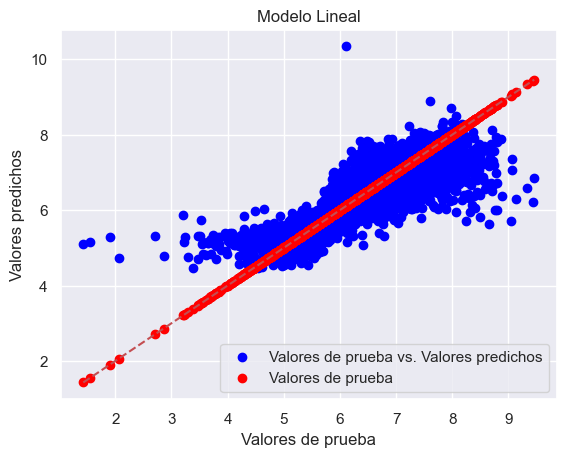

In [41]:
sns.set(style="darkgrid")
plt.scatter(y_test, predictions, color='blue', label='Valores de prueba vs. Valores predichos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Línea de referencia: valores reales = valores predichos
plt.scatter(y_test, y_test, color='red', label='Valores de prueba')
plt.xlabel('Valores de prueba')
plt.ylabel('Valores predichos')
plt.title('Modelo Lineal')
plt.legend()
plt.show()

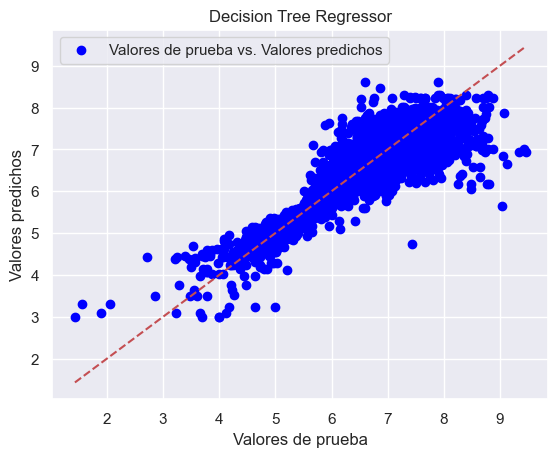

In [42]:
plt.scatter(y_test, y_pred_dtr, color='blue', label='Valores de prueba vs. Valores predichos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Línea de referencia: valores reales = valores predichos
plt.xlabel('Valores de prueba')
plt.ylabel('Valores predichos')
plt.title('Decision Tree Regressor')
plt.legend()
plt.show()

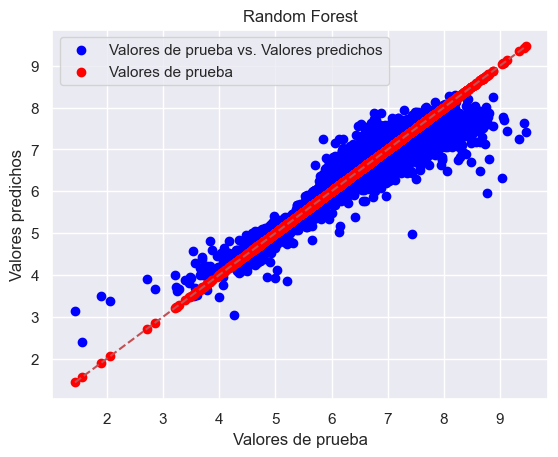

In [43]:
plt.scatter(y_test, y_pred_rdm_fs, color='blue', label='Valores de prueba vs. Valores predichos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Línea de referencia: valores reales = valores predichos
plt.scatter(y_test, y_test, color='red', label='Valores de prueba')
plt.xlabel('Valores de prueba')
plt.ylabel('Valores predichos')
plt.title('Random Forest')
plt.legend()
plt.show()

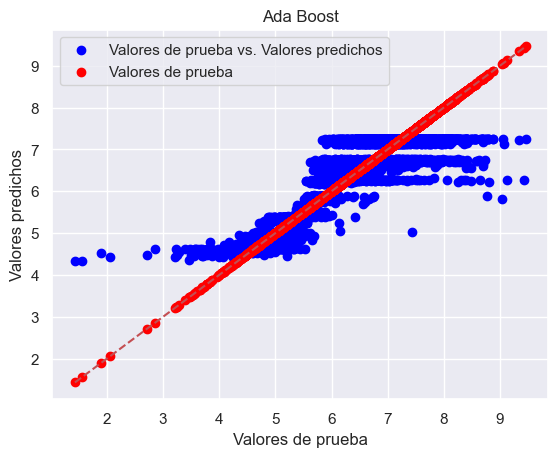

In [44]:
plt.scatter(y_test, y_pred_ada_gs, color='blue', label='Valores de prueba vs. Valores predichos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Línea de referencia: valores reales = valores predichos
plt.scatter(y_test, y_test, color='red', label='Valores de prueba')
plt.xlabel('Valores de prueba')
plt.ylabel('Valores predichos')
plt.title('Ada Boost')
plt.legend()
plt.show()

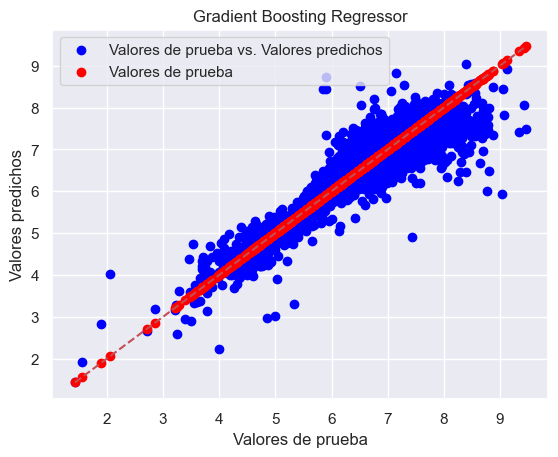

In [45]:
plt.scatter(y_test, y_pred_gbrt, color='blue', label='Valores de prueba vs. Valores predichos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Línea de referencia: valores reales = valores predichos
plt.scatter(y_test, y_test, color='red', label='Valores de prueba')
plt.xlabel('Valores de prueba')
plt.ylabel('Valores predichos')
plt.title('Gradient Boosting Regressor')
plt.legend()
plt.show()

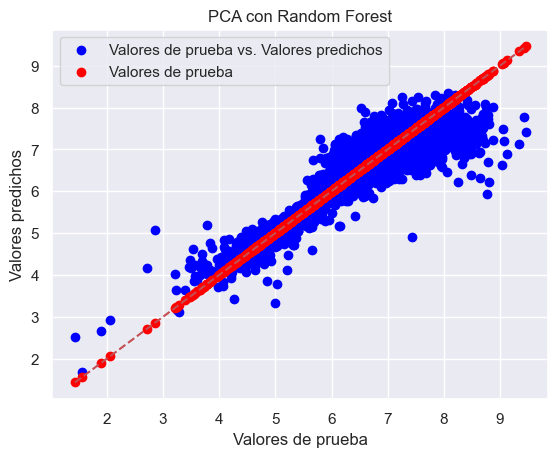

In [46]:
plt.scatter(y_test, y_pred_pca_rf, color='blue', label='Valores de prueba vs. Valores predichos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Línea de referencia: valores reales = valores predichos
plt.scatter(y_test, y_test, color='red', label='Valores de prueba')
plt.xlabel('Valores de prueba')
plt.ylabel('Valores predichos')
plt.title('PCA con Random Forest')
plt.legend()
plt.show()